# Projet IT44 : Intégration Numérique

## Introduction

Dans notre cas, on souhaite toujours calculer par une méthode numérique :

$$ I = \int_a^b f(x)\, dx$$

Pour le deuxième projet de l'UV IT44, nous nous intérressons d'implémenter une autre methode d'intégration numérique que les méthodes classiques implémentées en TP4.

## Methodes Gaussiennes



Comme nous avons vue pour les méthodes quadrature classiques, nous choisissons de manière équidistants les point de support. Nous définissons le pas d'intégration, $h$ pour $n$ sous-intervalles de $[a,b]$.
$$ h = \frac{b - a}{n}$$

Donc, pour une méthode classique, les points de support défini $∀ i ∈ \{0,…,n\}$
$$ x_{i+1} = x_i + h$$

Une méthode est dite Gaussienne si elle nous permet de choisir de manière optimale les points de support pour que la formule d'intégration est exacte pour tous les polynômes jusqu'à un certain degré.

### Comment choisissons-nous les points de support pour une méthode Gaussienne?

Les points de support $\{x_0, x_1, \dots, x_n\}$ que l'on cherche sont des racines d'un polynôme de degré $n+1$, qui est orthogonal à tout polynôme de degré inférieure ou égal à $n$.

Nous introduissons la notion de produit scalaire suivante :

$$ \langle p, q \rangle = \int_a^b p(x)q(x)ω(x)\, dx$$

où $ω(x)$ est le fonction de poids, positive et continue.

Deux polynômes $p$ et $q$ est orthogonaux si :

$$ \langle p, q\rangle = 0$$

Par l'algorithme de Gram-Schmidt, nous pouvons construire à partir d'une base canonique $(e_0, e_1,\dots,e_n)$, une base orthogonale $(f_0, f_1,\dots,f_n)$ de l'espace polynôme $P$.

Pour $k$, un éntier naturel quelconque, la base orthogonale correspondant est:
$$ f_k = e_k - \sum_{j=0}^{k-1} \Pi_{f_j}(e_k) $$

avec

$$\Pi_{f_j}(e_k) = \frac{\langle e_k, f_k \rangle}{\langle f_k, f_k \rangle}f_j$$

$f_k$ est orthogonal aux bases $f_{j \neq k}$.

En trouvant les racines de $f_{n+1}$, la base d'un polynôme $P_{n+1}$, nous avons les points de support $\{x_0,x_1,\dots,x_n\}$. Ensuite, il nous faut à calculer les poids associés:

$$ W_i = \int_a^b L_i.w(x)\, dx$$

Nous arrivons avec la formule de quadrature de Gauss :

$$ I \approx I^{Num} = \sum_{i = 0}^{n} W_if(x_i) $$

## Gauss-Legendre

### Principe Fondamental

La formule de Gauss-Legendre approxime l'intégrale suivante :  

$$ I = \int_{-1}^{1}f(x)\,dx = \sum_{i = 0}^{n} W_if(x_i) $$

Si nous avons $f$, une fonction continue definie sur une intervalle bornée $[a,b]$ nous pouvons toujours ramener cette intervalle d'intégration vers $[-1,1]$ en effectuant le changement de variable.

Pour appliquer la méthode, il nous faut ensuite des points de support $\{x_0, x_1, \dots, x_n\}$ qui peuvent être obtenus en calculant les racines du polynôme de Legendre, $L(x)$.

La rélation de récurrence du polynôme de Legendre est la suivante :

$$∀n\in ℕ\quad L_{n+1}(x) = \frac{2n+1}{n+1}xL_n(x)-\frac{n}{n+1}L_{n-1}(x)$$

Les poids $W_i$ sont donnée par :

$$W_i = \int_{-1}^{1} l_i(x)\,dx$$

où $l_i(x)$ sont les polynômes de Lagrange associés au support $\{x_0, x_1, \dots, x_n\}$

### Implémentations numériques

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp
import scipy as scp
from scipy.special import roots_legendre

In [64]:
x = smp.symbols('x')

# Les fonctions de test
def f1(x):
    return np.sin(x**2+x)

def f2(x):
    return 1 / ( x**2 + 1 )

def f3(x):
    return x**5 + 1/3 * x + 9*x

#### Gauss-Legendre sur intervalle $[-1,1]$

In [65]:
def Gauss_Legendre(f, n):
    '''
    Applique la méthode de quadrature de Gauss-Legendre à une fonction continue f
    sur l'intervalle [-1, 1], en utilisant n points de support

    f : fonction à intégrer
    n : le nombre de points de support

    Retourner une valeur approximée de l'intégration
    '''
    # roots_legendre(n) fournit les n racines du polynôme de Legendre de degré n et les poids associés
    points, poids = roots_legendre(n)

    print(f'Les points de support et poids associes pour n = {n}')
    print('*'*50)

    for i in range(n):

      print(f'x{i} = {points[i]:<20}, w{i} = {poids[i]:<20}')

    print('*'*50)

    # Calcul de l'approximation de l'intégrale
    result = sum(poids[i] * f(points[i]) for i in range(n))

    return result


In [66]:

print('I1 = sin(x**2+x)')
integ_approx = Gauss_Legendre(f1, 2)
integ_exact = float(smp.integrate(smp.sin(x**2+x), (x,-1,1)))

print(f'Valeur exacte     : {integ_exact}')
print(f'Valeur approximee : {integ_approx}')
print(f'Erreur commise    : {abs(integ_exact-integ_approx)}')

print('-'*50)
print('I2 = 1 / (1 + x²)')
integ_approx = Gauss_Legendre(f2, 2)
integ_exact = float(smp.integrate(1 / ( x**2 + 1 ), (x,-1,1)))

print(f'Valeur exacte     : {integ_exact}')
print(f'Valeur approximee : {integ_approx}')
print(f'Erreur commise    : {abs(integ_exact-integ_approx)}')

print('-'*50)
print('I3 = x**5 + 1/3 * x + 9*x')
integ_approx = Gauss_Legendre(f3, 2)
integ_exact = float(smp.integrate(x**5 + 1/3 * x + 9*x, (x,-1,1)))

print(f'Valeur exacte     : {integ_exact}')
print(f'Valeur approximee : {integ_approx}')
print(f'Erreur commise    : {abs(integ_exact-integ_approx)}')

I1 = sin(x**2+x)
Les points de support et poids associes pour n = 2
**************************************************
x0 = -0.5773502691896258 , w0 = 1.0                 
x1 = 0.5773502691896258  , w1 = 1.0                 
**************************************************
Valeur exacte     : 0.44884278649262294
Valeur approximee : 0.5483206128091461
Erreur commise    : 0.09947782631652319
--------------------------------------------------
I2 = 1 / (1 + x²)
Les points de support et poids associes pour n = 2
**************************************************
x0 = -0.5773502691896258 , w0 = 1.0                 
x1 = 0.5773502691896258  , w1 = 1.0                 
**************************************************
Valeur exacte     : 1.5707963267948966
Valeur approximee : 1.4999999999999998
Erreur commise    : 0.07079632679489678
--------------------------------------------------
I3 = x**5 + 1/3 * x + 9*x
Les points de support et poids associes pour n = 2
*******************************

 #### Gauss-Legendre généralisée sur $[a,b]$

In [67]:
def Gauss_Legendre_general(f, a, b, n):
    '''
    Applique la méthode de quadrature de Gauss-Legendre à une fonction continue f
    sur l'intervalle [a, b], en faisant un changement de variable pour ramener
    à l'intervalle [-1,1]

    f : fonction à intégrer
    a : borne inférieure de l'intégrale
    b : borne supérieure de l'intégrale
    n : le nombre de points de support

    Retourner une valeur approximée de l'intégration
    '''
    # Obtenir les points et poids sur [-1, 1]
    points, poids = roots_legendre(n)
    # Changement de variable pour [a, b]
    x_trans = 0.5 * (b - a) * points + 0.5 * (b + a)
    # Calcul de l'intégrale
    result = 0.5 * (b - a) * sum(poids[i] * f(x_trans[i]) for i in range(n))
    return result


In [68]:
integ_approx = Gauss_Legendre_general(f1, 0, 1, 3)
integ_exact = float(smp.integrate(smp.sin(x**2+x), (x,0,1)))

print(f'Valeur exacte     : {integ_exact}')
print(f'Valeur approximee : {integ_approx}')
print(f'Erreur commise    : {abs(integ_exact-integ_approx)}')

Valeur exacte     : 0.6143219793706307
Valeur approximee : 0.6139762508091084
Erreur commise    : 0.0003457285615222627


#### Comparaison avec les méthodes classiques

In [69]:
def simpson(f, a, b, n):
    '''
    Methode classique Simpson composée
    '''
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)

    if n % 2 != 0:
        raise ValueError("n doit être pair pour la méthode de Simpson")

    else :
        x_milieu = a + (np.arange(n) + 0.5) * h
        return (h / 6) * (f(a) + f(b) + 2 * np.sum(f(x[1:-1])) + 4 * np.sum(f(x_milieu)))

def trapeze(f, a, b, n):
    '''
    Methode classique trapèze composée
    '''
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)

    return (h / 2) * (f(a) + f(b)) + h * np.sum(f(x[1:-1]))

#### Visualisation des points et poids de Gauss-Legendre

In [ ]:
def visualiser_points_poids_gauss(n, a=-1, b=1):
    '''
    Affiche les points et poids de la quadrature de Gauss-Legendre
    pour un nombre de points n et un intervalle [a, b].
    
    - n : nombre de points (entier)
    - a, b : bornes de l'intervalle d'intégration (par défaut [-1, 1])
    '''
    # recuperer des points et poids sur 
    t, w = roots_legendre(n)
    
    # Transformation des points si l’intervalle n’est pas [-1,1]
    if (a, b) != (-1, 1):
        x = (b - a) / 2 * t + (a + b) / 2
        w = (b - a) / 2 * w
    else:
        x = t

    # Tracé
    plt.figure(figsize=(8, 5))
    plt.bar(x, w, width=(b - a) * 0.02, color='salmon', edgecolor='black')

    for i in range(n):
        plt.text(x[i], w[i] + max(w)*0.01, f'$w_{i} : ${w[i]:.4f}', ha='center', fontsize=10)

    plt.xlabel("Points $x_i$")
    plt.ylabel("Poids $w_i$")
    plt.title(f"Poids de Gauss-Legendre (n={n}) sur [{a}, {b}]")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


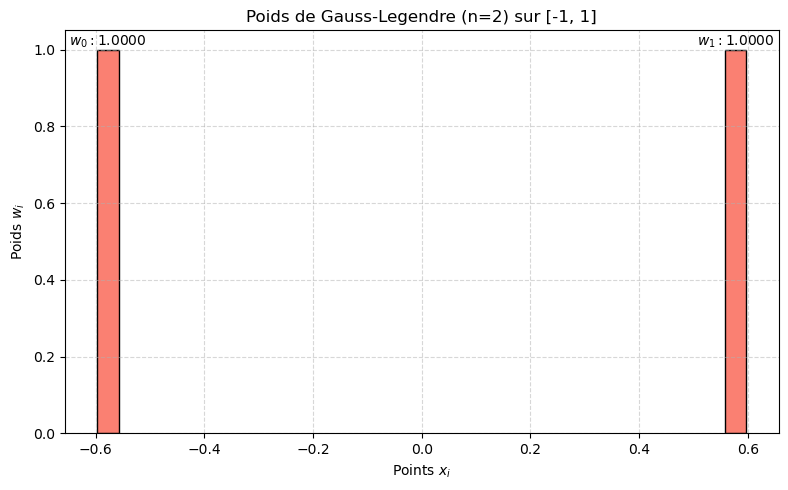

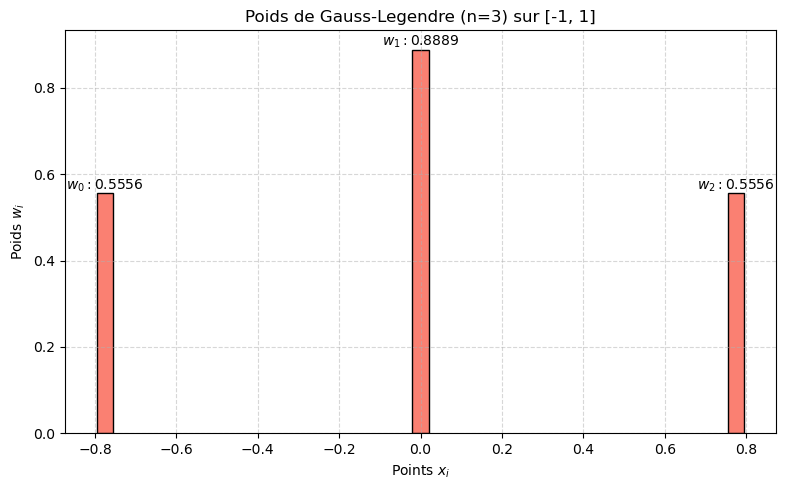

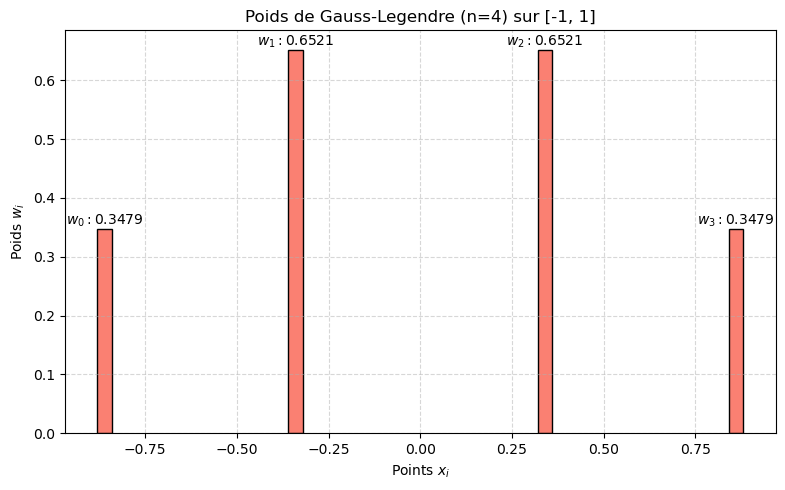

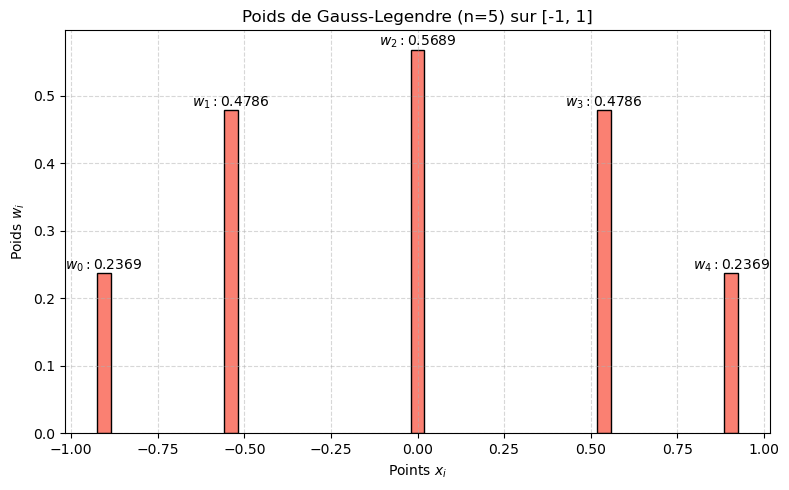

In [78]:
n = [2, 3, 4, 5]

for i in n:
    visualiser_points_poids_gauss(i)


$$\int_{-\infty}^{+\infty} e^{-x^2} \, dx$$